### Student Performance Prediction using Linear Legression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing as skp

In [2]:
# Stage 1: Data Gathering
df = pd.read_csv('https://raw.githubusercontent.com/yash240990/Python/master/Grade_Set_1.csv')
df

,Hours_Studied,Test_Grade,Status,Result
0,2,57,fail,D
1,3,66,fail,D
2,4,73,pass,C
3,5,76,pass,C
4,6,79,pass,C
5,7,81,pass,B
6,8,90,pass,B
7,9,96,pass,A
8,10,100,pass,A


In [3]:
# Stage 2: EDA
df.shape

(9, 4)

In [4]:
df.columns

Index(['Hours_Studied', 'Test_Grade', 'Status', 'Result'], dtype='object')

In [19]:
# Stage 3 : Data Preparation

In [6]:
# missing values
df.isnull().sum()

Hours_Studied    0
Test_Grade       0
Status           0
Result           0
dtype: int64

In [7]:
# duplicate values
df.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
dtype: bool

In [8]:
# convert non numerical features into numerical
lb = skp.LabelBinarizer()

In [9]:
df.Status = lb.fit_transform(df.Status)

In [10]:
df.Test_Grade.values

array([ 57,  66,  73,  76,  79,  81,  90,  96, 100])

In [11]:
# select independent and dependent variable

X = df.Hours_Studied.values
X = X.reshape(9,1)

Y = df.Test_Grade.values

In [12]:
import sklearn.linear_model as lm
lin_reg = lm.LinearRegression()

lin_reg.fit(X,Y)
df['predicted_values'] = lin_reg.predict(X)

In [13]:
df[['Hours_Studied','Test_Grade','predicted_values']]

,Hours_Studied,Test_Grade,predicted_values
0,2,57,59.711111
1,3,66,64.727778
2,4,73,69.744444
3,5,76,74.761111
4,6,79,79.777778
5,7,81,84.794444
6,8,90,89.811111
7,9,96,94.827778
8,10,100,99.844444


In [14]:
pred_val = lin_reg.predict(X)
pred_val

array([59.71111111, 64.72777778, 69.74444444, 74.76111111, 79.77777778,
       84.79444444, 89.81111111, 94.82777778, 99.84444444])

In [16]:
from sklearn.metrics import r2_score
accuracy = r2_score(Y, pred_val)
print('Accuracy Of Model :', accuracy)

Accuracy Of Model : 0.9757431074095347


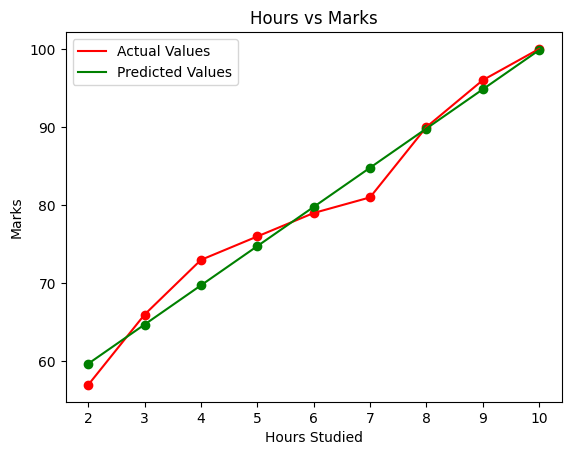

In [18]:
# plot actual values
plt.plot(X,Y,color='red',label='Actual Values')
plt.scatter(X,Y,color='red')
# plot predicted values
plt.plot(X,pred_val,color='green',label='Predicted Values')
plt.scatter(X,pred_val,color='green')
plt.title('Hours vs Marks')
plt.xlabel('Hours Studied')
plt.ylabel('Marks')
plt.legend()
plt.show()